# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [114]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [116]:
data = pd.read_csv("train.csv", index_col=0)

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [117]:
# Сделаем разделение по индексам
indices_train = np.random.choice(data.index, int(0.7 * len(data)), replace=False)
indices_test = np.setdiff1d(data.index, indices_train)

data_train = data.iloc[indices_train - 1]
data_test = data.iloc[indices_test - 1]

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [118]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [119]:
features_train, targets_train = get_features_and_target(data_train)
features_test, targets_test = get_features_and_target(data_test)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков.*

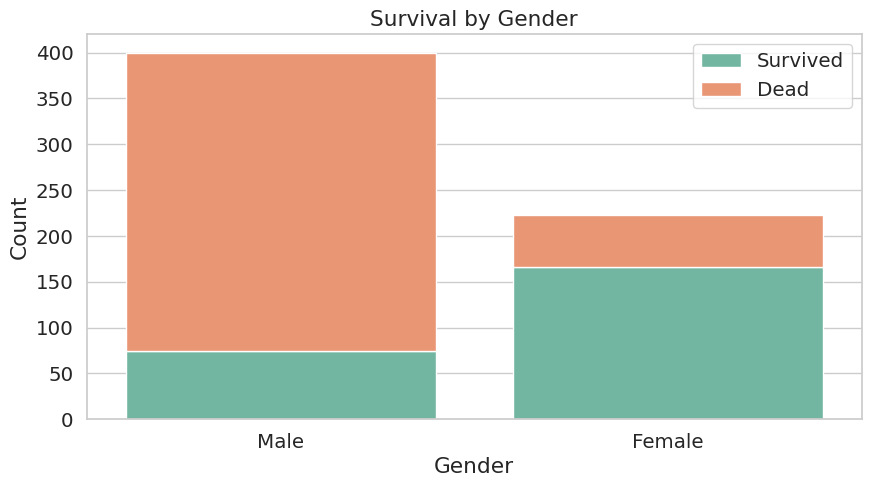

In [120]:
# Сравнение количества выживших в зависимости от пола
# Фильтруем данные по выжившим и погибшим для каждого пола
survived_male = data_train[(data_train["Survived"] == 1) & (data_train["Sex"] == "male")].shape[0]
dead_male = data_train[(data_train["Survived"] == 0) & (data_train["Sex"] == "male")].shape[0]

survived_female = data_train[(data_train["Survived"] == 1) & (data_train["Sex"] == "female")].shape[0]
dead_female = data_train[(data_train["Survived"] == 0) & (data_train["Sex"] == "female")].shape[0]

# Строим график
plt.figure(figsize=(10, 5))

sns.barplot(x=["Male", "Female"], y=[survived_male, survived_female], color=sns.color_palette("Set2")[0], label="Survived")
sns.barplot(x=["Male", "Female"], y=[dead_male, dead_female], color=sns.color_palette("Set2")[1], bottom=[survived_male, survived_female], label="Dead")

plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend()
plt.show()

Из графиков видно, что на титанике изначально было почти в два раза больше мужчин, но при этом выживших женщин примерно в два раза больше, чем выживших мужчин. То есть шанс выжить у женщин сильно выше, чем шанс выжить у мужчин.

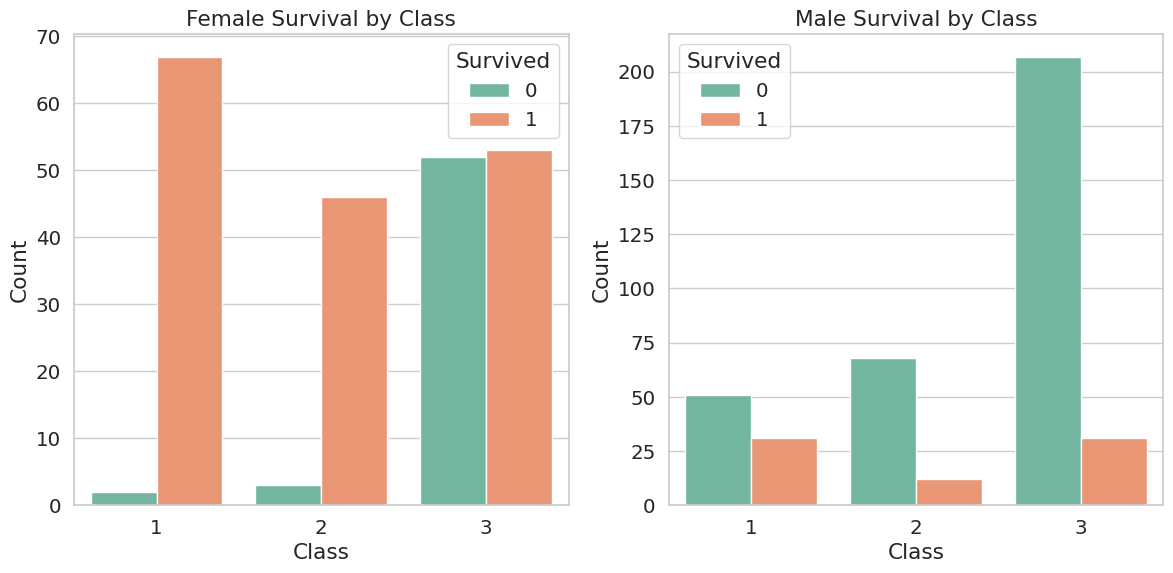

In [121]:
# Сравнение количества выживших в зависимости от класса
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Рисуем график для женщин
sns.countplot(x="Pclass", hue="Survived", data=data_train[data_train["Sex"] == "female"], ax=axes[0], palette="Set2")
axes[0].set_title("Female Survival by Class")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# Рисуем график для мужчин
sns.countplot(x="Pclass", hue="Survived", data=data_train[data_train["Sex"] == "male"], ax=axes[1], palette="Set2")
axes[1].set_title("Male Survival by Class")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

# Показываем графики
plt.tight_layout()
plt.show()

По диаграмме видно, что люди с 1-ым классом имели самый высокий шанс на спасения (особенно среди женщин), далее видно, что среди женщин большая часть выжила и со 2-ым классом. С 3-им классом у женщин практически половина выживших и половина погибших. Среди мужчин и 2-ой, и 3-ий класс показывает маленькое количество выживших.

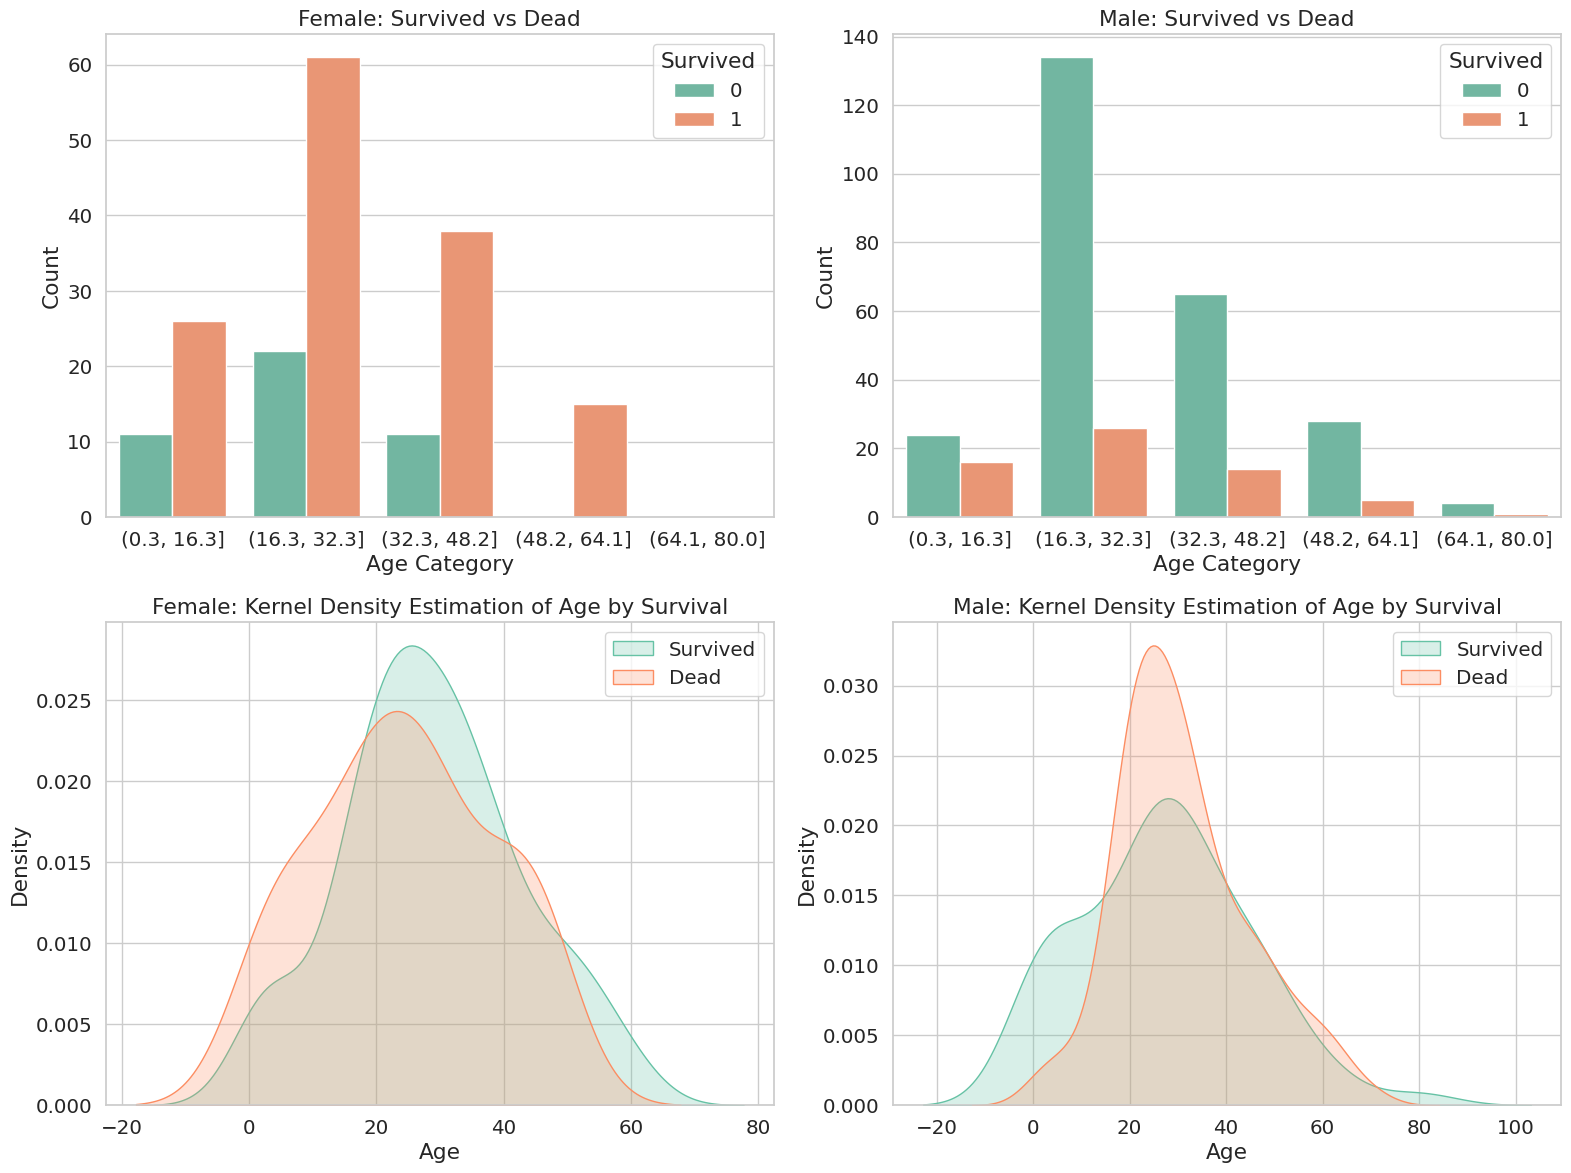

In [122]:
copy_data_train = data_train.copy(deep=True)

# Разделение возраста на 5 частей
copy_data_train['Age_Category'] = pd.cut(copy_data_train['Age'], bins=5, precision=1)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Выжившие и погибшие женщины по возрастным категориям
sns.countplot(x='Age_Category', hue='Survived', data=copy_data_train[copy_data_train['Sex'] == 'female'], ax=axes[0, 0])
axes[0, 0].set_title('Female: Survived vs Dead')
axes[0, 0].set_xlabel('Age Category')
axes[0, 0].set_ylabel('Count')

# График 2: Выжившие и погибшие мужчины по возрастным категориям
sns.countplot(x='Age_Category', hue='Survived', data=copy_data_train[copy_data_train['Sex'] == 'male'], ax=axes[0, 1])
axes[0, 1].set_title('Male: Survived vs Dead')
axes[0, 1].set_xlabel('Age Category')
axes[0, 1].set_ylabel('Count')

# График 3: KDE для выживших и погибших женщин по возрасту
sns.kdeplot(data=copy_data_train[(copy_data_train['Sex'] == 'female') & (copy_data_train['Survived'] == 1)]['Age'],
            label='Survived', fill=True, ax=axes[1, 0])
sns.kdeplot(data=copy_data_train[(copy_data_train['Sex'] == 'female') & (copy_data_train['Survived'] == 0)]['Age'],
            label='Dead', fill=True, ax=axes[1, 0])
axes[1, 0].set_title('Female: Kernel Density Estimation of Age by Survival')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()

# График 4: KDE для выживших и погибших мужчин по возрасту
sns.kdeplot(data=copy_data_train[(copy_data_train['Sex'] == 'male') & (copy_data_train['Survived'] == 1)]['Age'],
            label='Survived', fill=True, ax=axes[1, 1])
sns.kdeplot(data=copy_data_train[(copy_data_train['Sex'] == 'male') & (copy_data_train['Survived'] == 0)]['Age'],
            label='Dead', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Male: Kernel Density Estimation of Age by Survival')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

Среди женщин различных возрастов отношение погибших к выжившим не сильно колеблется. Среди мужчин видно, что самый лучший показатель у детей.

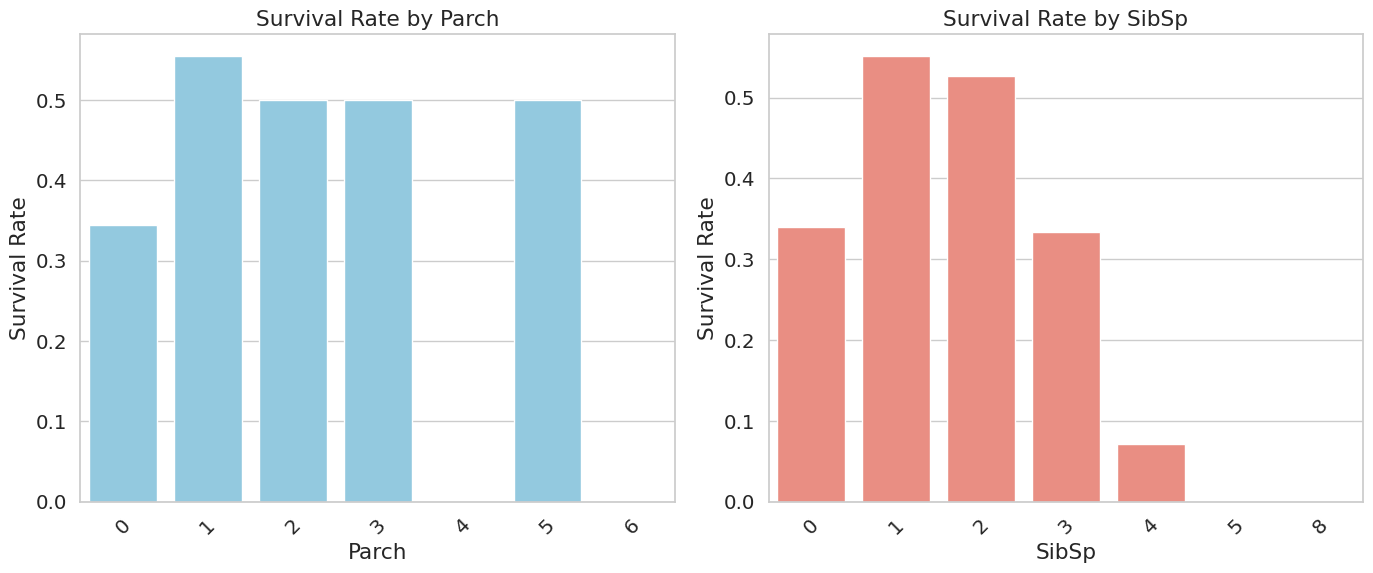

In [123]:
survival_by_parch = data_train.groupby('Parch')['Survived'].mean().reset_index()
survival_by_sibsp = data_train.groupby('SibSp')['Survived'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Первый график - выживаемость от Parch
sns.barplot(x='Parch', y='Survived', data=survival_by_parch, color='skyblue', ax=axes[0])
axes[0].set_title('Survival Rate by Parch')
axes[0].set_xlabel('Parch')
axes[0].set_ylabel('Survival Rate')
axes[0].tick_params(axis='x', rotation=45)

# Второй график - выживаемость от SibSp
sns.barplot(x='SibSp', y='Survived', data=survival_by_sibsp, color='salmon', ax=axes[1])
axes[1].set_title('Survival Rate by SibSp')
axes[1].set_xlabel('SibSp')
axes[1].set_ylabel('Survival Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Из первой диаграммы видно, что у людей с небольшими семьями вероятности выжить выше, чем у одиноких людей и у многодетных семей.
При этом на второй диаграмме заметна приличная разница между количеством братьев/сестер или супругов.

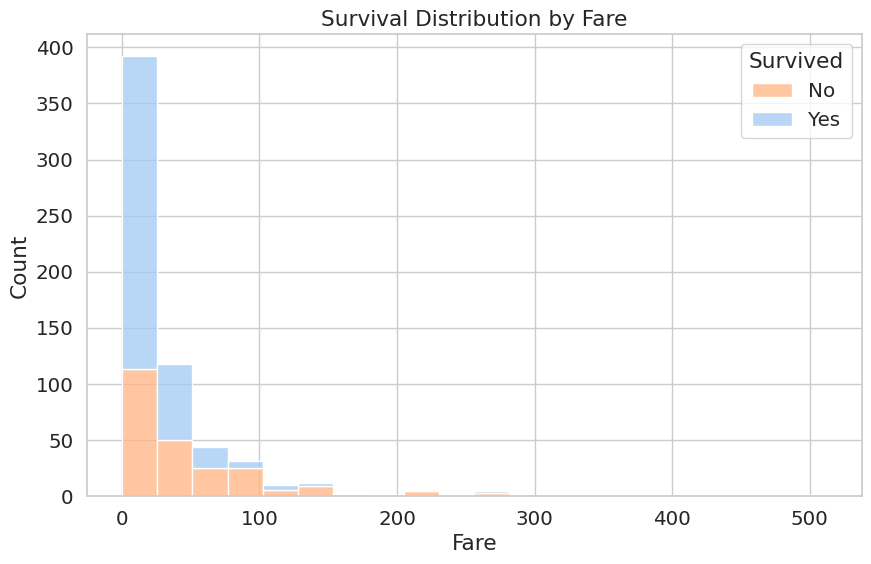

In [124]:
# График с зависимостью от тарифа
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='Fare', hue='Survived', bins=20, multiple='stack', palette='pastel')
plt.title('Survival Distribution by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Из такого растянутого графика плохо видны диапазоны, поэтому поставим ограничение 90 на тариф.

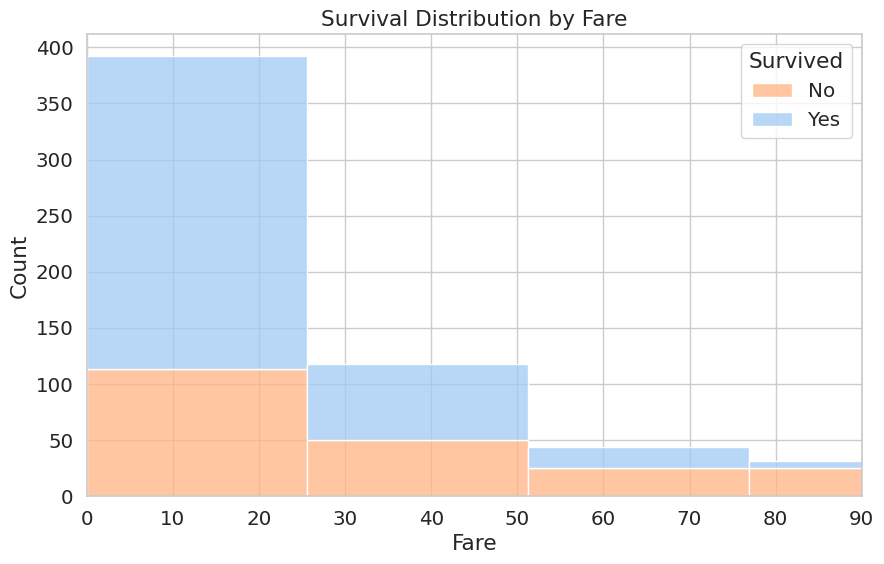

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='Fare', hue='Survived', bins=20, multiple='stack', palette='pastel')
plt.title('Survival Distribution by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xlim(0, 90)
plt.show()

Из графика видно, что количество выживших с тарифом до 25 примерно в 3 раза больше, чем количество погибших с этим тарифом. Данное отношение не прослеживается в остальных диапазонах.

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи.

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [126]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''

    def find_nearest_neighbors(test_row, train_features, k):
        distances = np.sqrt(((train_features - test_row) ** 2).sum(axis=1))
        sorted_indices = np.argsort(distances)
        nearest_indices = sorted_indices[:k]
        return nearest_indices

    def predict_target(nearest_indices, train_target):
        nearest_targets = train_target.iloc[nearest_indices]
        predicted_target = nearest_targets.mode().iloc[0]
        return predicted_target

    predicted_targets = []
    for index, test_row in features.iterrows():
        nearest_indices = find_nearest_neighbors(test_row, train_features, k)
        predicted_target = predict_target(nearest_indices, train_target)
        predicted_targets.append(predicted_target)

    return pd.Series(predicted_targets, index=features.index)

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`.

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

In [127]:
# Считаем среднее значение и стандартное отклонение для возраста и стоимости
mean_age = features_train["Age"].mean()
std_age = features_train["Age"].std()
mean_fare = features_train["Fare"].mean()
std_fare = features_train["Fare"].std()

# Применяем стандартизацию к тренировачным данным
features_train_scaled = features_train.copy()
features_train_scaled["Age"] = (features_train["Age"] - mean_age) / std_age
features_train_scaled["Fare"] = (features_train["Fare"] - mean_fare) / std_fare

# Применяем стандартизацию к тестовым данным
features_test_scaled = features_test.copy()
features_test_scaled["Age"] = (features_test["Age"] - mean_age) / std_age
features_test_scaled["Fare"] = (features_test["Fare"] - mean_fare) / std_fare

# Запускаем классификатор
prediction = knn(features_test_scaled, features_train_scaled[["Age", "Fare"]], targets_train, k=5)
print("Количество предполагаемых выжишивших при k = 5: ", sum(prediction))

Количество предполагаемых выжишивших при k = 5:  103


В качестве метрики я использую Евклидово расстояние между двумя точками. Так как распределения у стоимости и возраста разные, нужно сделать стандартизацию данных, иначе признаки будут вносить разные по весу изменения.

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [128]:
prediction = knn(features_test, features_train[["Age", "Fare"]], targets_train, k=1)
print("Количество предполагаемых выжишивших при k = 1: ", sum(prediction))

prediction = knn(features_test, features_train[["Age", "Fare"]], targets_train, k=3)
print("Количество предполагаемых выжишивших при k = 3: ", sum(prediction))

prediction = knn(features_test, features_train[["Age", "Fare"]], targets_train, k=7)
print("Количество предполагаемых выжишивших при k = 7: ", sum(prediction))

prediction = knn(features_test, features_train[["Age", "Fare"]], targets_train, k=9)
print("Количество предполагаемых выжишивших при k = 9: ", sum(prediction))

prediction = knn(features_test, features_train[["Age", "Fare"]], targets_train, k=11)
print("Количество предполагаемых выжишивших при k = 11: ", sum(prediction))

prediction = knn(features_test, features_train[["Age", "Fare"]], targets_train, k=13)
print("Количество предполагаемых выжишивших при k = 13: ", sum(prediction))

Количество предполагаемых выжишивших при k = 1:  115
Количество предполагаемых выжишивших при k = 3:  116
Количество предполагаемых выжишивших при k = 7:  86
Количество предполагаемых выжишивших при k = 9:  79
Количество предполагаемых выжишивших при k = 11:  71
Количество предполагаемых выжишивших при k = 13:  66


Видно, что сначала результат изменяется сильно (разница между k=1, k=3 и k=5), но при дальнейшем увеличении количества соседей результат практически не изменяется.

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы?

Другие признаки можно было бы учесть отмасштабировав так же, как это было сделано с Fare и Age и добавить им какой-то вес, чтобы они в меньшей степени учитывались. При этом могли бы возникнуть проблемы с нормализацией родственников (SibSp и Parch), так как там есть аномалии, где Survival Rate близок к 0, потому что количество, например, людей с 8-мью братьями/сестрами очень мало.

Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Так как шанс выжить среди женщин с 1-ым или 2-ым классом велик, то будем использовать дерево по этим двум признакам. Соответственно, изначально делим на мужчины и женщин, а после смотрим класс. Получаем дерево глубиной 2.

**Дерево 2:**

Так как количество выживших в 3 раза больше, чем количество погибших в диапазоне стоимости тарифа (0, 25), то возьмем это за первый признак. По графику вероятности выживаемости в зависимости от количество детей/родителей на борту видно, что вероятность >= 0.5 для людей, у которых от 1 до 3 близких. Возьмем это за второй признак.

Реализуйте полученные деревья по шаблону

In [129]:
def first_tree(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted_targets = []
    for index, test_row in features.iterrows():
        predicted_target = 1 if (test_row['Sex'] == 'female') & (test_row['Pclass'] != '3') else 0
        predicted_targets.append(predicted_target)

    return pd.Series(predicted_targets, index=features.index)

def second_tree(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted_targets = []
    for index, test_row in features.iterrows():
        predicted_target = 1 if test_row['Fare'] <= 25 & test_row['Parch'] <= 3 & test_row['Parch'] >= 1 else 0
        predicted_targets.append(predicted_target)

    return pd.Series(predicted_targets, index=features.index)


#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Считаем количество совпавших ответов и делим на общее количество ответов. Получаем вероятность верного результата.
Реализуйте данный критерий по шаблону

In [130]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''

    return (sum(target == predicted)) / len(target)

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [131]:
# Считаем ответ для первого дерева
first_tree_predictions = first_tree(features_test)
first_tree_criteria = criteria(targets_test, first_tree_predictions)
print(f'По критерию оценки вероятность правильного ответа для первого дерева: {first_tree_criteria:.4f}')

# Считаем ответ для второго дерева
second_tree_predictions = second_tree(features_test)
second_tree_criteria = criteria(targets_test, second_tree_predictions)
print(f'По критерию оценки вероятность правильного ответа для второго дерева: {second_tree_criteria:.4f}')

# Считаем ответ для kNN
knn_predictions = knn(features_test, features_train[["Age", "Fare"]], targets_train, k=7)
knn_criteria = criteria(targets_test, knn_predictions)
print(f'По критерию оценки вероятность правильного ответа для kNN: {knn_criteria:.4f}')

По критерию оценки вероятность правильного ответа для первого дерева: 0.7799
По критерию оценки вероятность правильного ответа для второго дерева: 0.6194
По критерию оценки вероятность правильного ответа для kNN: 0.6493


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

Полученная оценка при k = 1 : 0.6530
Полученная оценка при k = 2 : 0.6343
Полученная оценка при k = 3 : 0.6194
Полученная оценка при k = 4 : 0.6343
Полученная оценка при k = 5 : 0.6306
Полученная оценка при k = 6 : 0.6567
Полученная оценка при k = 7 : 0.6493
Полученная оценка при k = 8 : 0.6679
Полученная оценка при k = 9 : 0.6828
Полученная оценка при k = 10 : 0.6791


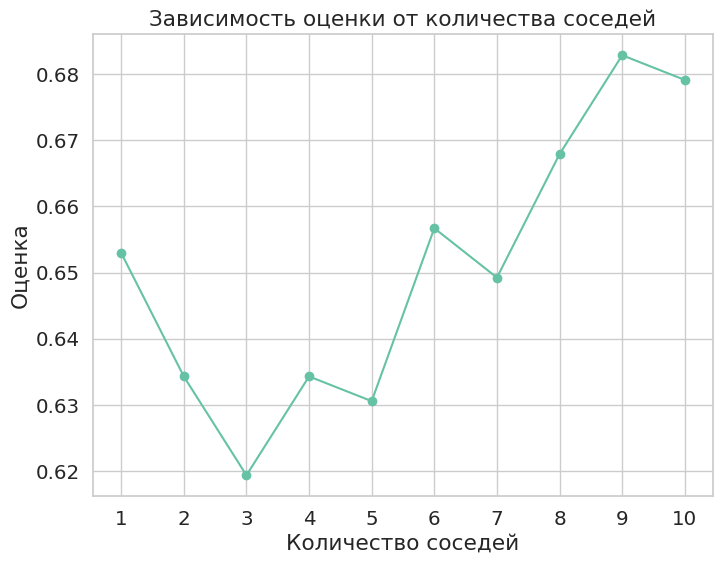

In [134]:
criterias = []
for k in range(1, 11):
    predictions = knn(features_test, features_train[["Age", "Fare"]], targets_train, k=k)
    knn_criteria = criteria(targets_test, predictions)
    print(f'Полученная оценка при k = {k} : {knn_criteria:.4f}')
    criterias.append(knn_criteria)


plt.figure(figsize=(8, 6))

plt.plot(range(1, 11), criterias, marker='o', linestyle='-')

plt.title('Зависимость оценки от количества соседей')
plt.xlabel('Количество соседей')
plt.ylabel('Оценка')
plt.xticks(range(1, 11))

plt.grid(True)
plt.show()

В данной ситуации снижение для к=2 и к=3 показывает, что появляются какие-то аномалии, которые уменьшают точность, далее оценка растет с ростом количества соседей.

#### 6. Выводы

Эксперимент показывает, насколько сильно разные признаки влиют на таргет. Это особенно видно при сравнении первого решающего дерева и kNN, где оценка у дерева гораздо лучше. Так же исходя из оценок kNN можно понять, что на данном датасете требуется либо использовать специфические веса при учете соседей, либо строить и на других данных, чтобы улучшить показатели.

Еще при анализе данных важно учитывать, что в данных могут быть выбросы, которые не должны слишком сильно влиять на результат (особенно сильно это заметно при использовании Евклидова расстояния, когда ставится в соответствие квадрат величины).